<a href="https://colab.research.google.com/github/Etnawu/Data-analysis-of-Airbnb-in-Toronto/blob/main/Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data analysis of Airbnb data in Toronto





Examination of dataset with detailed listings data.

Data downloaded from: [insideairbnb.com](http://insideairbnb.com/get-the-data/) (listings.csv.gz)

Data last scraped: 2024-02-15

Data Dictionary: [Provided by Data provider](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=1322284596)

License: [Creative Commons Attribution 4.0 International License](https://creativecommons.org/licenses/by/4.0/)

Expected Update Frequency: Never

# Import

*   import pandas
*   import matplotlib
*   impoty numpy
*   import dataset from Github repo



Data set has previously been trimmed on Excel prior to upload.
Unrelated columns has been removed.
Listings with no reviews have also been removed.






Below columns have been removed using excel




*   id	listing_url
*   scrape_id
*   last_scraped
*   source
*   picture_url
*   host_id
*  host_url
*   List item
* host_about
* host_thumbnail_url
* host_picture_url
* host_verifications
* host_has_profile_pic
* host_identity_verified
* neighbourhood
* neighbourhood_group_cleansed
* latitude
* longitude
* bedrooms
* beds
* calendar_updated
* calendar_last_scraped
* first_review
* last_review
* license
* calculated_host_listings_count
* calculated_host_listings_count_entire_homes
* calculated_host_listings_count_private_rooms
* calculated_host_listings_count_shared_rooms


In [ ]:
!pip install pandas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
url = 'https://raw.githubusercontent.com/Etnawu/airbnb2023/main/listings.csv'
df = pd.read_csv('https://raw.githubusercontent.com/Etnawu/airbnb2023/main/listings.csv')

In [ ]:
row_count = len(df)
print("Number of rows:", row_count)

Number of rows: 15197


# Questions to answer

What is the optimal neighborhood in Toronto for an Airbnb listing ?

Market analysis

*   How does the distribution of entire home/apartment and private room listings vary across different neighborhoods in Toronto?

*  Reviews average by neighborhood location

*  Guest turnover

# Analysis and Visualization

We will first examine the availability of entire home/apartment listings versus private room listings across different neighborhoods. To do so, we will be examining the neighborhood_cleansed column and the room_type column.


*   The neighborhood_cleansed variable assigns neighborhoods to specific geographic coordinates (latitude and longitude) using publicly available digital shapefiles, enabling the analysis of neighborhood-level attributes based on their geographic location. It utilizes the geometric shapes defined in the shapefiles to match the coordinates of each location with the corresponding neighborhood boundaries.
*   The  room_type variable showcases whether the listing is of the entire property versus renting out a single room. This variable can help us determine whether it's more popular for host to rent out a spare bedroom versus renting out an entire property for Airbnb





# Types of rentals
Note: Private rooms entails a rental unit within a property while entire homes/apt indicates entire property as rental unit


In [ ]:
#Count for properties for each unique neighborhood
properties_per_neighborhood = df['neighbourhood_cleansed'].value_counts()
print(properties_per_neighborhood)

#Find Average
average_properties_per_neighborhood = properties_per_neighborhood.mean()
print(average_properties_per_neighborhood)

Waterfront Communities-The Island    2439
Niagara                               605
Annex                                 490
Trinity-Bellwoods                     407
Church-Yonge Corridor                 401
                                     ... 
Bridle Path-Sunnybrook-York Mills      14
Humber Summit                          14
Rustic                                 12
Elms-Old Rexdale                       10
Kingsway South                          8
Name: neighbourhood_cleansed, Length: 140, dtype: int64
108.55


In [ ]:
# Group the dataframe by neighborhood and find the most common room type in each neighborhood, than get unique neighborhoods
most_common_property = df.groupby('neighbourhood_cleansed')['room_type'].agg(lambda x: x.mode()[0])
neighborhoods = most_common_property.index

#Count types of rental type by neighborhood
neighborhood_rtype_counts = df.groupby(['neighbourhood_cleansed', 'room_type']).size()

## Private Rooms

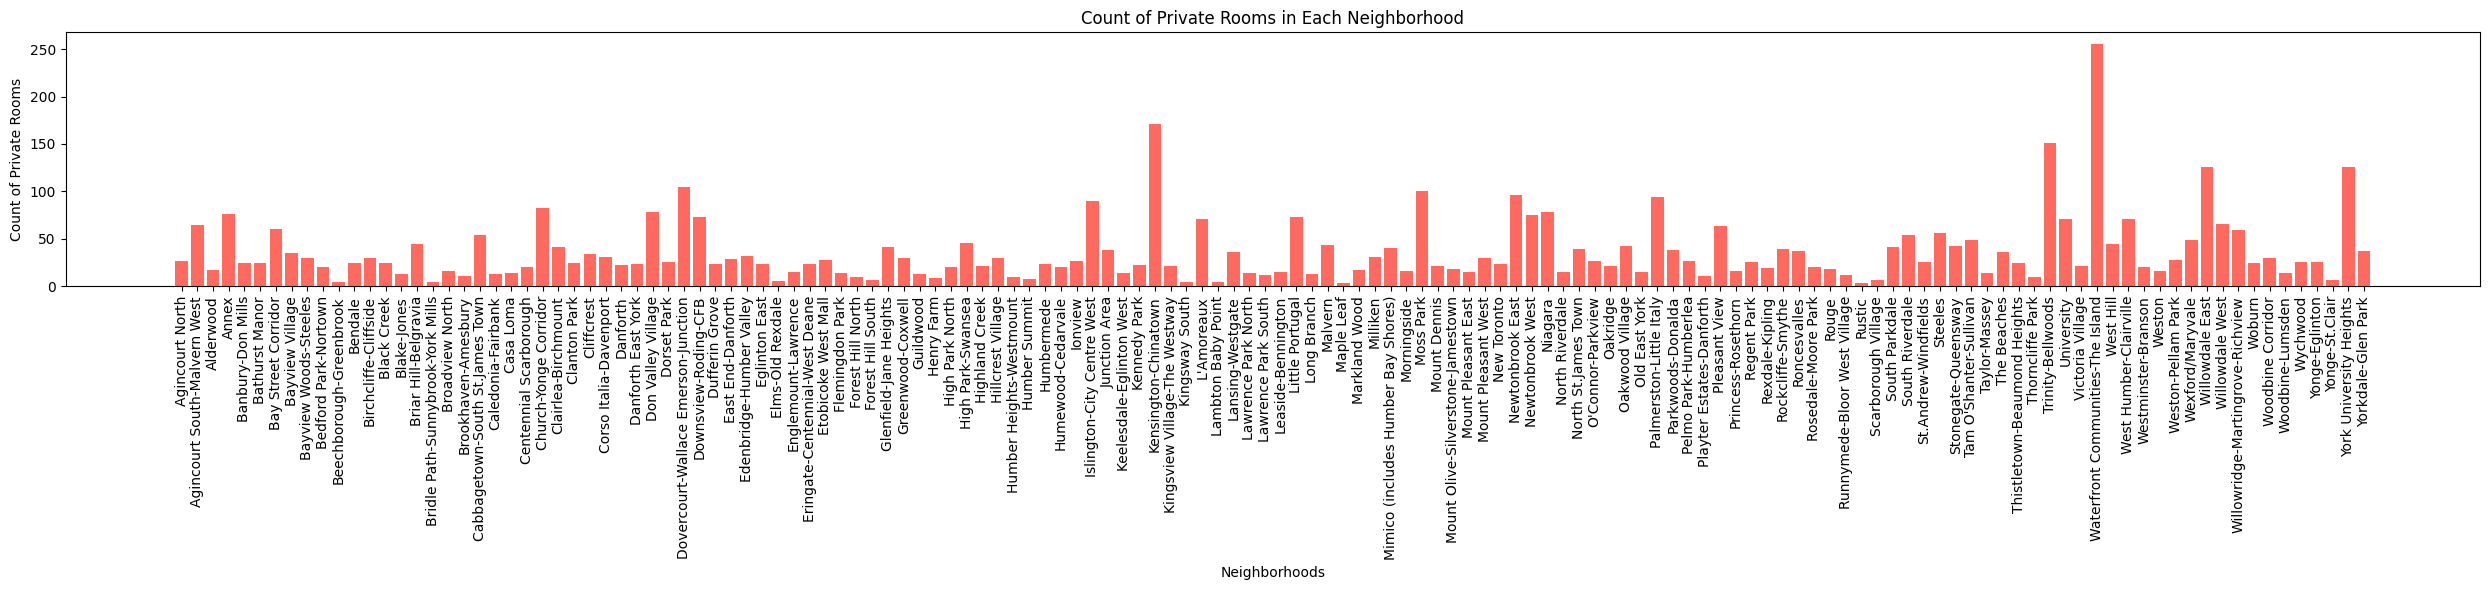

In [ ]:
#Get private room available in each unique neighborhood
private_room_counts = neighborhood_rtype_counts.loc[neighborhoods, 'Private room']

# Plot bar chart
plt.figure(figsize=(25, 6))
bar_width = 0.5  # Adjust the width of the bars
plt.bar(neighborhoods, private_room_counts, color='#ff6a60')

# Add labels and title
plt.xlabel('Neighborhoods')
plt.ylabel('Count of Private Rooms')
plt.title('Count of Private Rooms in Each Neighborhood')
plt.xticks(rotation=90)
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
# Sort the private room counts in descending order than get top 20
private_top_20_neighborhoods = private_room_counts.sort_values(ascending=False).head(20)

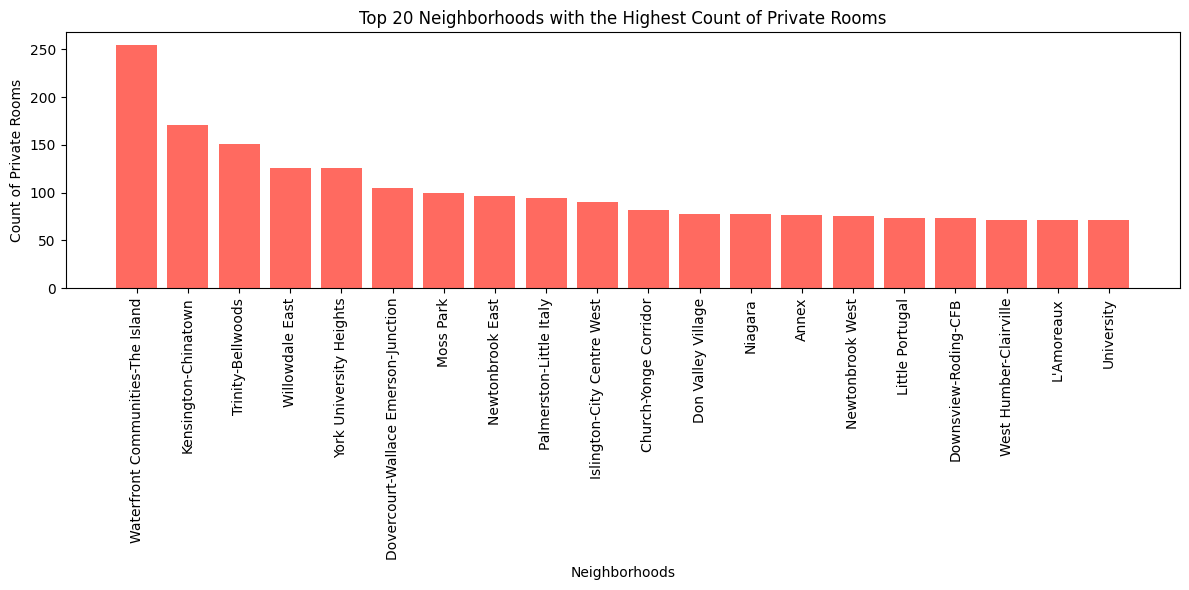

In [ ]:
# Extract the neighborhood names and counts
priv_neighborhood_names = private_top_20_neighborhoods.index.get_level_values('neighbourhood_cleansed')
priv_counts = private_top_20_neighborhoods.values

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(priv_neighborhood_names, priv_counts, color='#ff6a60')

# Add labels and title
plt.xlabel('Neighborhoods')
plt.ylabel('Count of Private Rooms')
plt.title('Top 20 Neighborhoods with the Highest Count of Private Rooms')
plt.xticks(rotation=90)
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
#Average count of private airbnb listings per neighborhood
priv_mean = priv_counts.mean()
print(priv_mean)

103.1


In [ ]:
print(private_room_counts.sort_values(ascending=False).head(5))

neighbourhood_cleansed             room_type   
Waterfront Communities-The Island  Private room    255
Kensington-Chinatown               Private room    171
Trinity-Bellwoods                  Private room    151
Willowdale East                    Private room    126
York University Heights            Private room    126
dtype: int64


In the context of private room listings, the average availability per neighborhood is **103.1**. Certain neighborhoods exhibit notably higher levels of availability, indicating a more competitive market for hosts considering renting private rooms in these areas via Airbnb.

**Waterfront Communities-The Island**: **255** private room listings. It's 147% above average availability indicates high competition but with potential high guest turnovers

**Kensington-Chinatown** : **171** private room listings. 66% above average.

**Trinity-Bellwoods**: **151** private
 room listings. 46% above average.

**Willowdale East and York University Heights** :**126** private room listings. 22% above average.



In [ ]:
#Get all neighborhoods with below average listings for private rooms
below_count_priv = private_room_counts[private_room_counts < priv_mean]
print(below_count_priv.sort_values(ascending=False).head(5))

neighbourhood_cleansed      room_type   
Moss Park                   Private room    100
Newtonbrook East            Private room     96
Palmerston-Little Italy     Private room     94
Islington-City Centre West  Private room     90
Church-Yonge Corridor       Private room     82
dtype: int64


Above are several neighborhoods with fewer listings than average, which could present attractive options for individual hosts interested in renting out a single room within their property.



---



## Entire home/apt

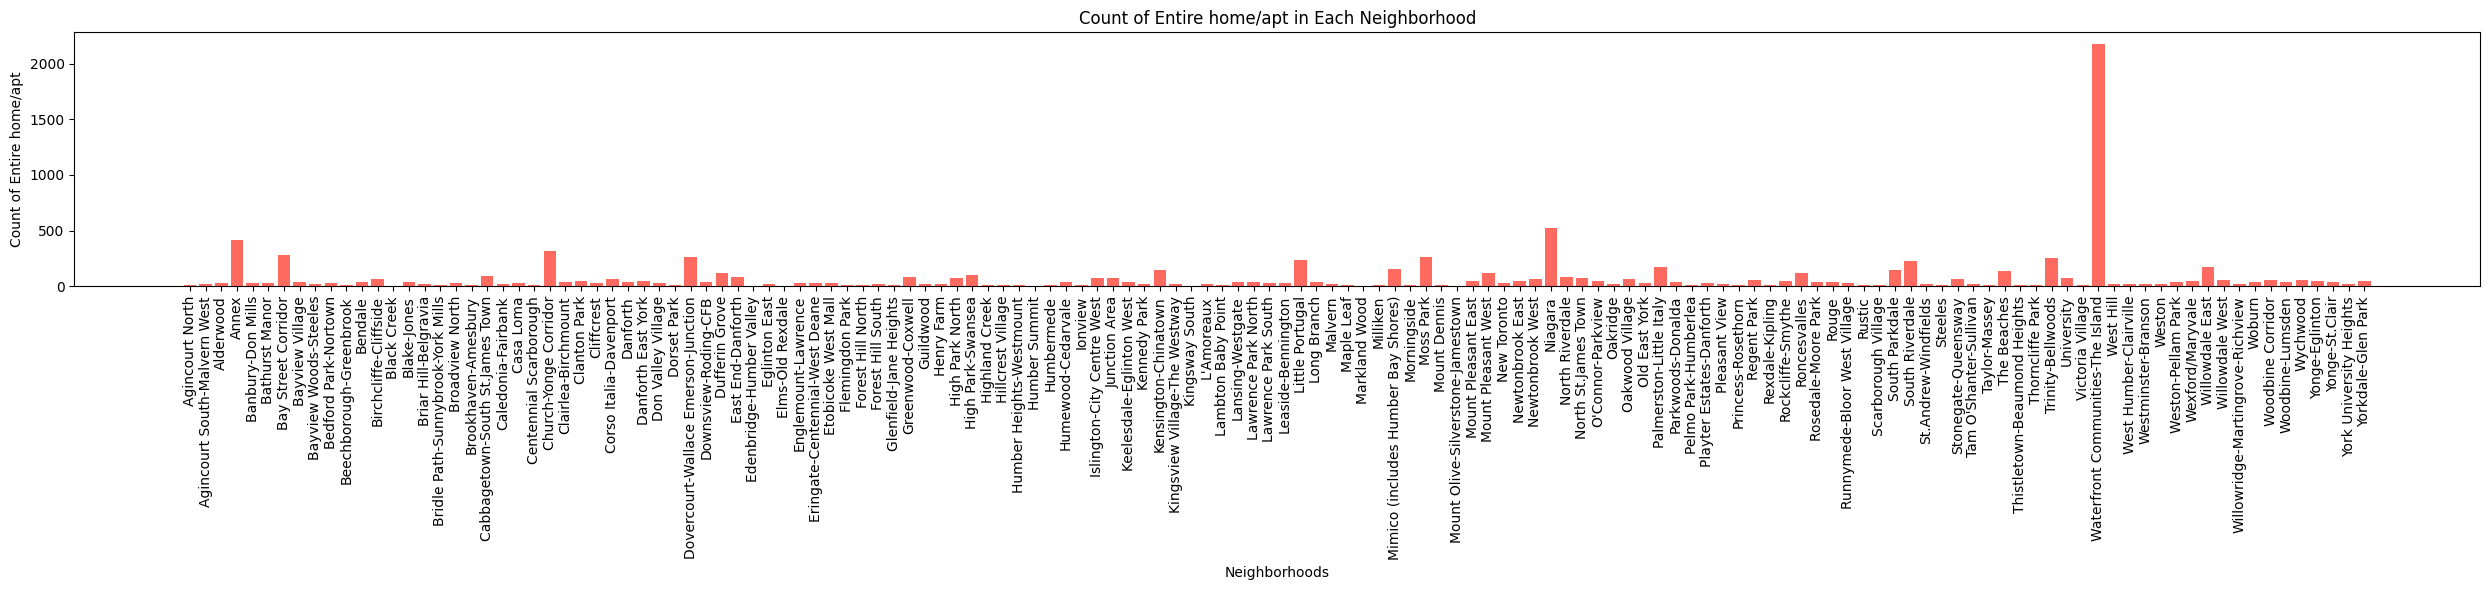

In [ ]:
#Get home listing available in each unique neighborhood
entire_counts = neighborhood_rtype_counts.loc[neighborhoods, 'Entire home/apt']

# Plot bar chart
plt.figure(figsize=(25, 6))
bar_width = 0.5  # Adjust the width of the bars
plt.bar(neighborhoods, entire_counts, color='#ff6a60')

# Add labels and title
plt.xlabel('Neighborhoods')
plt.ylabel('Count of Entire home/apt')
plt.title('Count of Entire home/apt in Each Neighborhood')
plt.xticks(rotation=90)
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
#Average count of private airbnb listings per neighborhood
entire_mean = entire_counts.mean()
print(entire_mean)

71.29285714285714


In [ ]:
# Sort the entire home  counts in descending order than get top 20
entire_top_20_neighborhoods = entire_counts.sort_values(ascending=False).head(20)

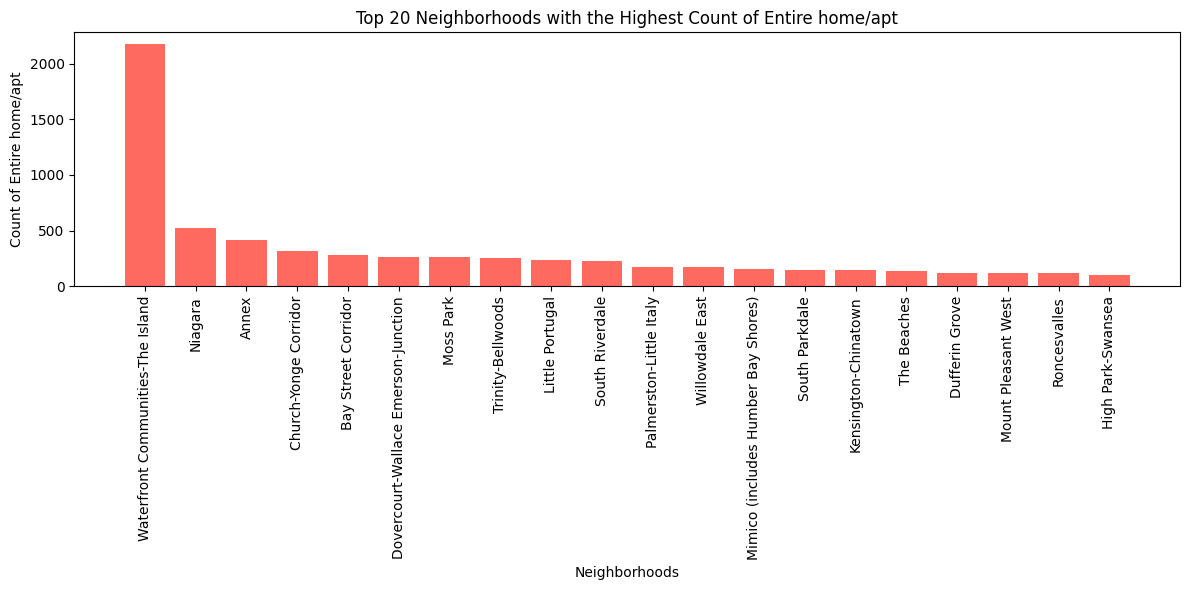

In [ ]:
# Extract the neighborhood names and counts
entire_neighborhood_names = entire_top_20_neighborhoods.index.get_level_values('neighbourhood_cleansed')


# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(entire_neighborhood_names, entire_top_20_neighborhoods, color='#ff6a60')

# Add labels and title
plt.xlabel('Neighborhoods')
plt.ylabel('Count of Entire home/apt')
plt.title('Top 20 Neighborhoods with the Highest Count of Entire home/apt')
plt.xticks(rotation=90)
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
print(entire_counts.sort_values(ascending=False).head(5))

neighbourhood_cleansed             room_type      
Waterfront Communities-The Island  Entire home/apt    2173
Niagara                            Entire home/apt     524
Annex                              Entire home/apt     412
Church-Yonge Corridor              Entire home/apt     313
Bay Street Corridor                Entire home/apt     281
dtype: int64


 In the context of entire home/apartment listings, the average availability per neighborhood is **316.9**. Certain neighborhoods exhibit notably higher levels of availability, indicating a more competitive market for hosts considering renting entire homes/apartments in these areas via Airbnb.

**Waterfront Communities-The Island**: 2173 entire home/apartment listings, significantly above average availability +2901.71%.

**Niagara**: 524 entire home/apartment listings.+635.36%

**Annex**: 412 listings. +477.92%

**Church-Yonge Corridor**: 313 listings. +339.14%

**Bay Street Corridor**: 281 listings. +294.46%

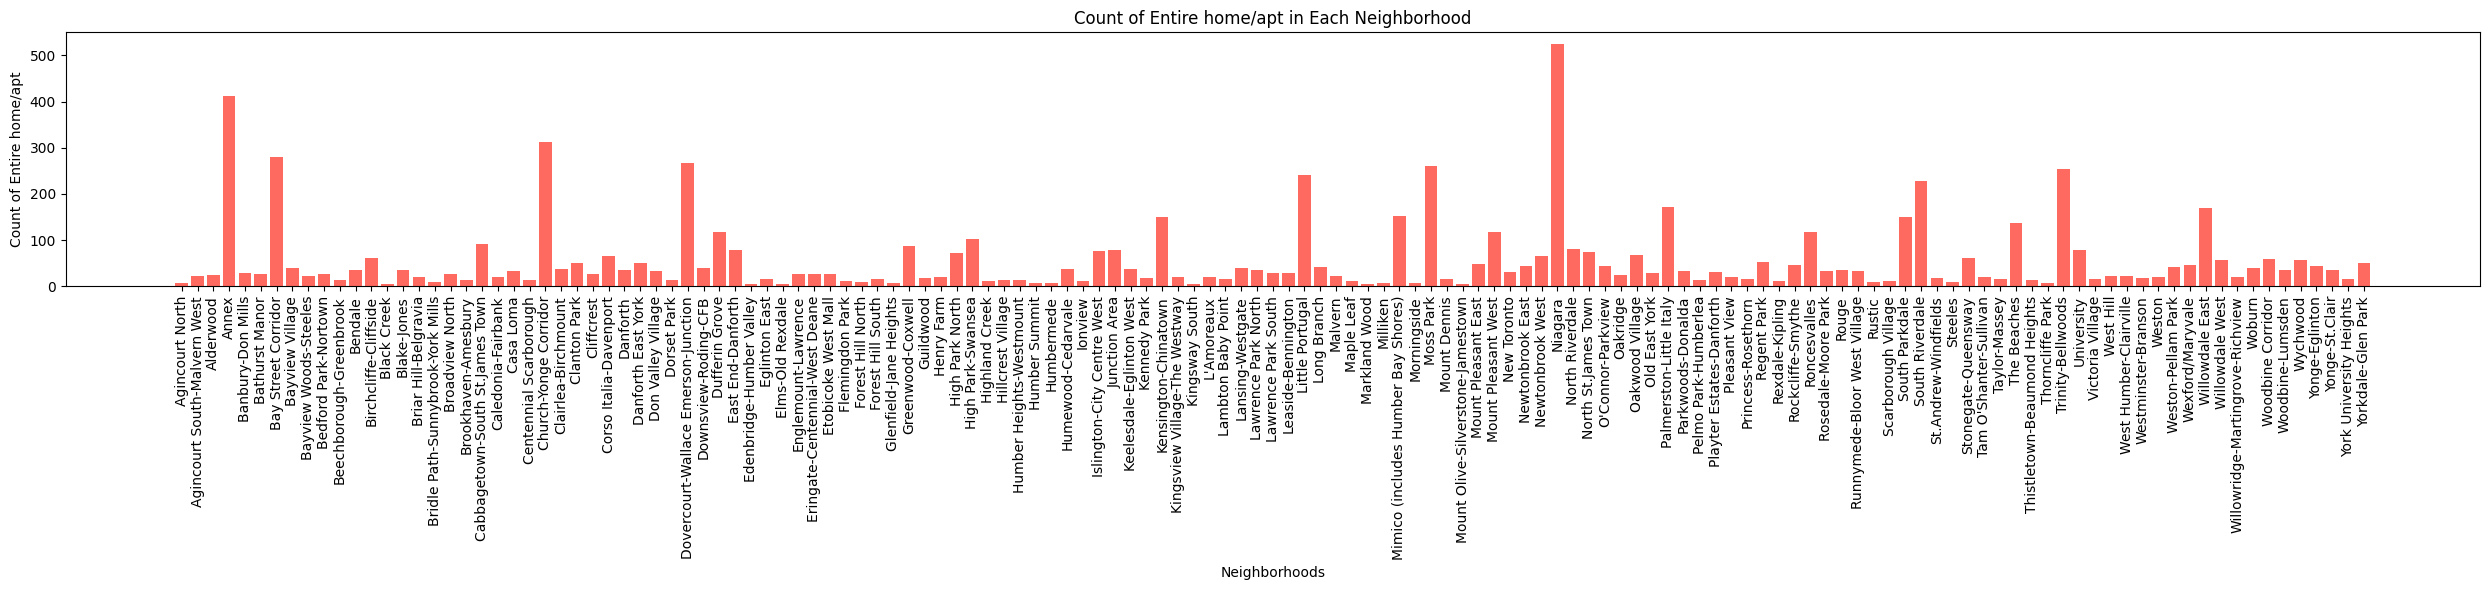

In [ ]:
#Dropping row of Waterfront Communities-The Island from count
adj_entire_counts = entire_counts.drop(index='Waterfront Communities-The Island')

#Dropping row of Waterfront Communities-The Island from neighborhood so we can plot
adj_neighborhood = neighborhoods.drop('Waterfront Communities-The Island')

# Plot bar chart
plt.figure(figsize=(25, 6))
bar_width = 0.5  # Adjust the width of the bars
plt.bar(adj_neighborhood, adj_entire_counts, color='#ff6a60')

# Add labels and title
plt.xlabel('Neighborhoods')
plt.ylabel('Count of Entire home/apt')
plt.title('Count of Entire home/apt in Each Neighborhood')
plt.xticks(rotation=90)
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
#Average count of adjusted
adj_entire_mean = adj_entire_counts.mean()
print(adj_entire_mean)

56.172661870503596


To gain a more accurate understanding of the availability of Airbnb of entire properties, it's prudent to adjust the average by removing the outlier, Waterfront Communities-The Island. By recalibrating the average without the influence of this outlier, we can obtain a more representative benchmark for comparison across neighborhoods.

By dropping Airbnb listings in the Waterfront Communities (The Island). The average of entire properties available drops from **71.29** to **56.172**.
A 21.19% drop

In [ ]:
#Get all neighborhoods with below average listings for entire properties
below_count_ent = adj_entire_counts[adj_entire_counts < adj_entire_mean]
print(below_count_ent.sort_values(ascending=False).head(5))

neighbourhood_cleansed  room_type      
Willowdale West         Entire home/apt    56
Regent Park             Entire home/apt    52
Yorkdale-Glen Park      Entire home/apt    51
Clanton Park            Entire home/apt    51
Danforth East York      Entire home/apt    50
dtype: int64


Here are 5 neighborhoods with fewer listings than the average. They could be great choices for hosts who want to rent out their entire properties on Airbnb.

In [ ]:
private_tot = private_room_counts.sum()
ent_tot = entire_counts.sum()

print("Total private room listings:", private_tot)
print("Total entire home listings:", ent_tot)

Total private room listings: 5115
Total entire home listings: 9981


It is worth noting that Torontonian hosts seem to prefer renting entire homes for Airbnb has opposed to renting out a spare bedroom as 66% of all listing are of entire properties



---



# Relationship between neighborhoods and reviews

Airbnb reviews allow guests to rate their experience across six categories:

**Cleanliness**: Guests can rate the cleanliness of the property, including the overall tidiness and hygiene.

**Accuracy**: Guests can evaluate the accuracy of the property description and photos compared to their actual experience during their stay.

**Check-in**: Guests can review the smoothness of the check-in process, including communication with the host and access to the property.

**Communication**: Guests can rate the host's communication responsiveness, clarity, and helpfulness throughout the booking process and during their stay.

**Location**: Guests can assess the property's location, including its convenience, safety, and proximity to attractions or amenities.

**Value**: Guests can provide feedback on the overall value they received for the price paid, considering factors such as amenities, location, and overall experience.

We will be focusing on locations today

## Location reviews and neighborhoods
We can determine the attractiveness of neighborhoods by comparing location review scores with neighborhoods


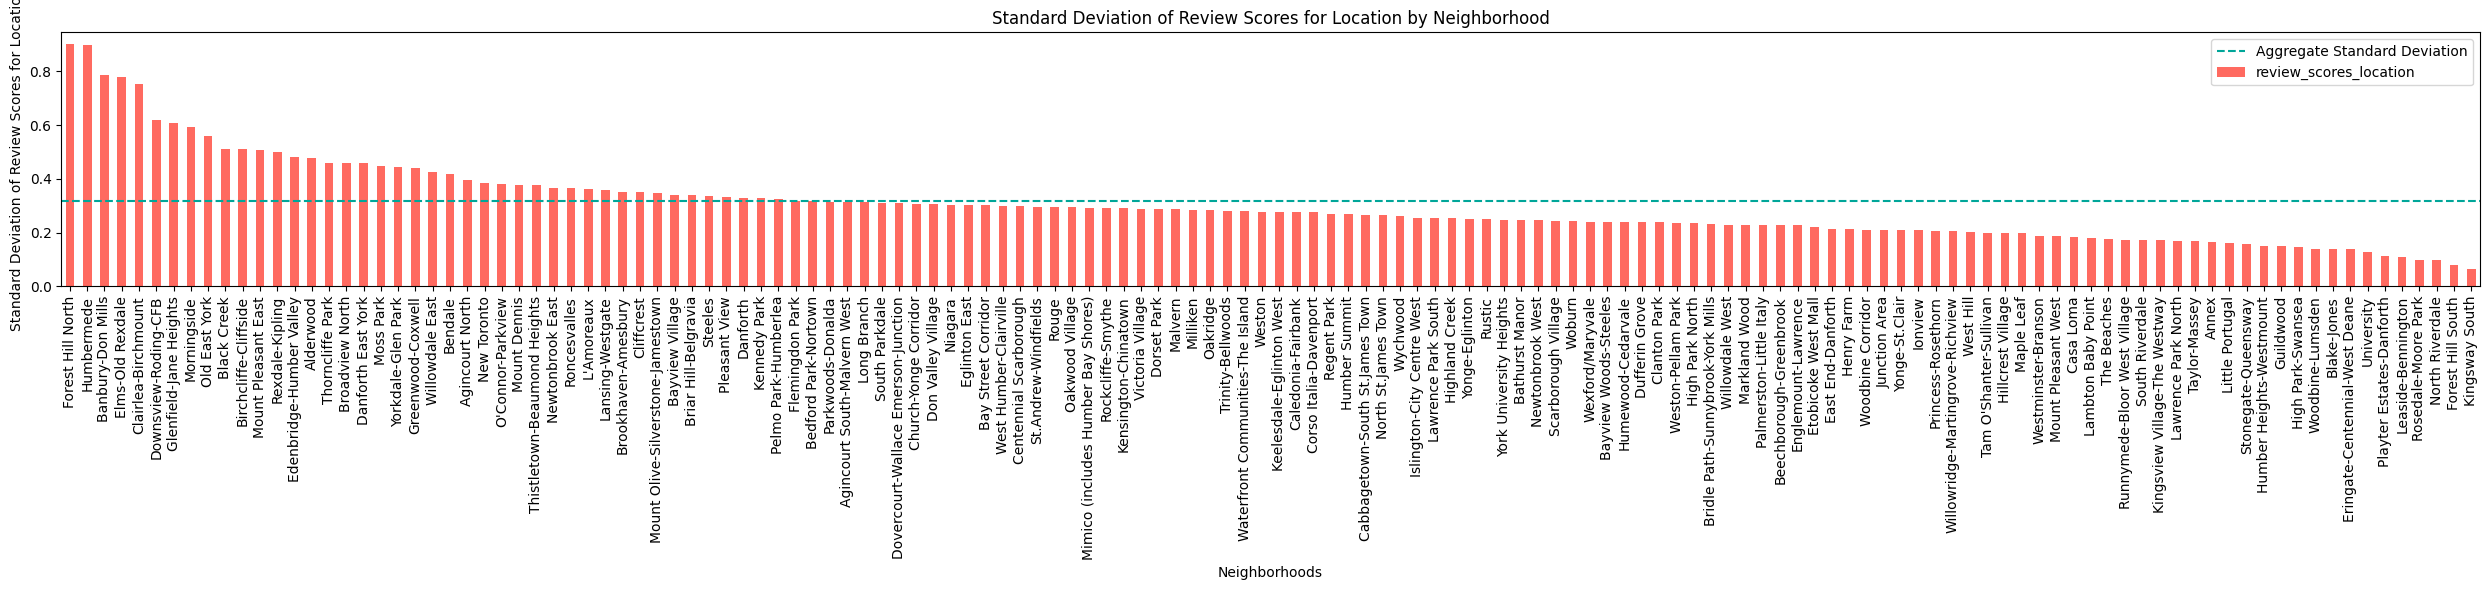

Difference from Aggregate Standard Deviation:
neighbourhood_cleansed
Agincourt North                 0.078114
Agincourt South-Malvern West   -0.005295
Alderwood                       0.158483
Annex                          -0.154118
Banbury-Don Mills               0.466756
                                  ...   
Wychwood                       -0.056921
Yonge-Eglinton                 -0.069260
Yonge-St.Clair                 -0.110692
York University Heights        -0.070466
Yorkdale-Glen Park              0.126299
Name: review_scores_location, Length: 140, dtype: float64


In [ ]:
# Calculate the aggregate standard deviation of all review scores for location
aggregate_std_location_score = df['review_scores_location'].std()

# Calculate standard deviations of review scores for location by neighborhood
neighborhood_std_scores = df.groupby('neighbourhood_cleansed')['review_scores_location'].std()

# Calculate the difference between each neighborhood's standard deviation and the aggregate standard deviation
std_location_difference = neighborhood_std_scores - aggregate_std_location_score

# Sorting the neighborhoods by standard deviation
neighborhood_std_scores = neighborhood_std_scores.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(25, 6))
neighborhood_std_scores.plot(kind='bar', color='#ff6a60')
plt.axhline(y=aggregate_std_location_score, color='#00A699', linestyle='--', label='Aggregate Standard Deviation')
plt.title('Standard Deviation of Review Scores for Location by Neighborhood')
plt.xlabel('Neighborhoods')
plt.ylabel('Standard Deviation of Review Scores for Location')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

# Print the difference for each neighborhood
print("Difference from Aggregate Standard Deviation:")
print(std_location_difference)

In [ ]:
# Calculate standard deviations of review scores for location by neighborhood
neighborhood_std_scores = df.groupby('neighbourhood_cleansed')['review_scores_location'].std()

# Sort the neighborhoods by standard deviation
neighborhood_std_scores_sorted = neighborhood_std_scores.sort_values(ascending=False)

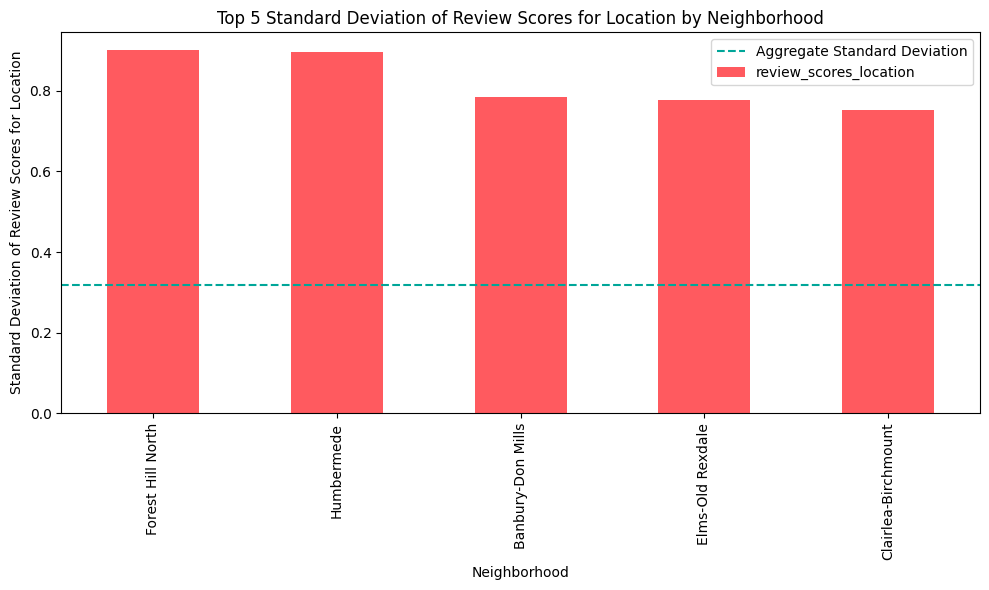

In [ ]:
# Top 5 neighborhoods based on location review
location_top_5 = neighborhood_std_scores_sorted.head(5)

# Plot
plt.figure(figsize=(10, 6))
location_top_5.plot(kind='bar', color='#FF5A5F')
plt.axhline(y=aggregate_std_location_score, color='#00A699', linestyle='--', label='Aggregate Standard Deviation')
plt.title('Top 5 Standard Deviation of Review Scores for Location by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Standard Deviation of Review Scores for Location')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

These neighborhoods exhibits above average location review scores, suggesting potential investment opportunities due to comparatively more popular location to guests.


In [ ]:
#Find count of property for top 5
properties_in_top_5 = properties_per_neighborhood.loc[['Forest Hill North', 'Humbermede','Banbury-Don Mills' , 'Elms-Old Rexdale', 'Clairlea-Birchmount']]

print(properties_in_top_5)
print('Average of Properties per neighborhood')
print(average_properties_per_neighborhood)

Forest Hill North      19
Humbermede             31
Banbury-Don Mills      56
Elms-Old Rexdale       10
Clairlea-Birchmount    81
Name: neighbourhood_cleansed, dtype: int64
Average of Properties per neighborhood
108.55


These neighborhoods have the highest average location review scores across all the neighborhoods. Furthermore, the average listings in each neighborhood is below average.

*   This raises the question of the number of reviews per neighborhood. Given that these neighborhoods boast the highest average location review scores despite having listings below the average, one may wonder about the extent of guest feedback contributing to such high ratings. Exploring the volume and quality of reviews in these neighborhoods could provide valuable insights into the factors influencing guests' satisfaction and the overall desirability of the listings

*   This issue should be resolved by looking at guests turnover rates











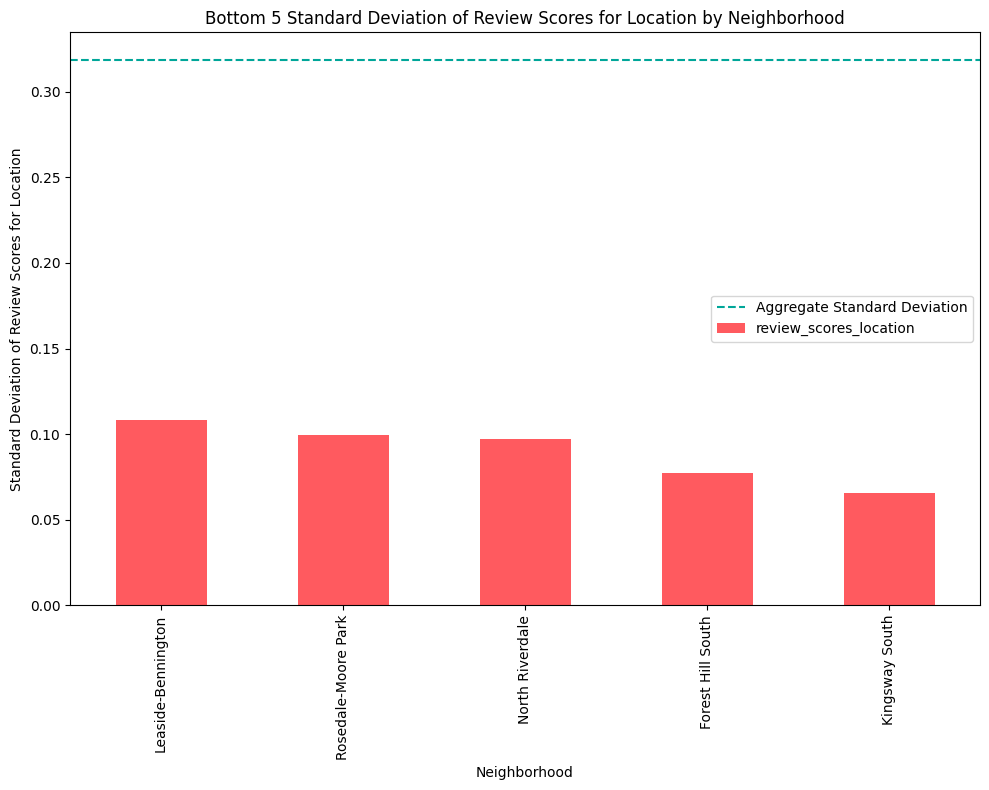

In [ ]:
# Bottom 5 neighborhoods based on location review
location_bottom_5 = neighborhood_std_scores_sorted.tail(5)

# Plot
plt.figure(figsize=(10, 8))
location_bottom_5.plot(kind='bar', color='#FF5A5F')
plt.axhline(y=aggregate_std_location_score, color='#00A699', linestyle='--', label='Aggregate Standard Deviation')
plt.title('Bottom 5 Standard Deviation of Review Scores for Location by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Standard Deviation of Review Scores for Location')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

The listings located in these neighborhoods exhibit below-average location review scores on and could be viewed as less attractive to guests. Perhaps due to convenience or distance from attractions.


In [ ]:
#Find count of property for bottom 5
properties_in_bottom_5 = properties_per_neighborhood.loc[['Leaside-Bennington', 'Rosedale-Moore Park','North Riverdale' , 'Forest Hill South', 'Kingsway South']]

print(properties_in_bottom_5)
print('Average of Properties per neighborhood')
print(average_properties_per_neighborhood)

Leaside-Bennington     44
Rosedale-Moore Park    54
North Riverdale        96
Forest Hill South      23
Kingsway South          8
Name: neighbourhood_cleansed, dtype: int64
Average of Properties per neighborhood
108.55


However, with the exception of North Riverdale, the bottom 5 neighborhood based on location review from Airbnb all have below average amounts of listings. The lack of competition may be an advantage for hosts that may want to rent on Airbnb in these neighborhoods.





---



# Guests Turnover Rates

Guests Turnover Rates can be examined by looking at the reviews_per_year column of our dataframe. Reviews per month can provide insight on frequency of guest feedback and activity within a specific area. This will also solve the issue of the rating quality issue raised while examining the top 5 neighborhoods based on location reviews.

Reviews per year is measured as "[The average number of reviews per month the listing has over the lifetime of the listing.](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=1322284596&range=D83)" According to the data dictionary provided by [insideairbnb.com](http://insideairbnb.com/get-the-data/).

## Reviews Per Month

In [ ]:
#Find average RPM for each neighborhood
neighborhood_rpm = df.groupby('neighbourhood_cleansed')['reviews_per_month'].mean()

print(neighborhood_rpm)

neighbourhood_cleansed
Agincourt North                 1.050571
Agincourt South-Malvern West    0.898046
Alderwood                       1.272619
Annex                           1.104429
Banbury-Don Mills               1.079107
                                  ...   
Wychwood                        1.445904
Yonge-Eglinton                  1.075286
Yonge-St.Clair                  0.894419
York University Heights         0.926463
Yorkdale-Glen Park              1.676932
Name: reviews_per_month, Length: 140, dtype: float64


In [ ]:
#Find mean so we get a benchmark
print(neighborhood_rpm.mean())

1.1512653583281953


In [ ]:
#Find RPM for top 5 neighborhoods by location review
top_5_rpm = neighborhood_rpm.loc[['Forest Hill North', 'Humbermede','Banbury-Don Mills' , 'Elms-Old Rexdale', 'Clairlea-Birchmount']]
print(top_5_rpm)

neighbourhood_cleansed
Forest Hill North      0.770526
Humbermede             1.367742
Banbury-Don Mills      1.079107
Elms-Old Rexdale       1.738000
Clairlea-Birchmount    1.109630
Name: reviews_per_month, dtype: float64


It is worth noting that Humbermede and Elms-Old Rexdale exhibit above-average reviews per month. Despite a notably lower number of listings on Airbnb compared to the average, these neighborhoods maintain above-average location review scores and experience significant guest turnover

In [ ]:
top_1_rpm = neighborhood_rpm.loc[['Waterfront Communities-The Island']]
print(top_1_rpm)

neighbourhood_cleansed
Waterfront Communities-The Island    1.793128
Name: reviews_per_month, dtype: float64


It is also worth noting that although Waterfront Communities-The Island has significantly more listings compare to any of the top 5 neighborhoods by location review, it only marginally surpasses them in terms of reviews per month.

# Conclusion

While the observations offer valuable insights into certain dynamics of Airbnb listings in the Toronto market, reaching conclusive decisions on the optimal neighborhood for Airbnb listings necessitates further analysis and exploration of related factors.

However, we did discover that
1. 66% of all listings examined were of entire properties while only 34% of the listings are private rooms within a property
2.   Humbermede and Elms-Old Rexdale has above-average reviews per month, despite having fewer Airbnb listings than the average neighborhood. Remarkably, these neighborhoods has above-average location review scores and has above average guest turnover
3.  The proxmity of the Toronto Pearson International Airport likely plays an important role to the high guest turnover and above-average reviews per month
4.   These observations suggest that these neighborhoods are performing exceptionally well in terms of guest satisfaction and turnover and could be attractive to potential visitors or Airbnb host


It is important to note that these findings are purely observational, and in no way a result of formal study/advice

## Future questions and considerations
* Price location analysis
* Amenities to review
* Instant booking, Super Host and response time and reviews
* Analysis of host_since data and review per month data

